# ДИПЛОМНАЯ РАБОТА

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import researchpy as rp

from sklearn import preprocessing
from scipy.stats import t
from scipy.stats import norm
from scipy import stats


## 1. Загрузить файл HR.csv

In [2]:
data = pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, минимум, максимум, среднее отклонение).

In [3]:
#Расчет основных статистик для переменных с помощью метода describe()
round(data.describe(), 2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


In [4]:
#Расчет моды
print('\nМода:')
data.mode().drop([1])


Мода:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low


## 3. Рассчитать и визуализировать корреляционную матрицу для переменных.


МАТРИЦА КОРРЕЛЯЦИЙ


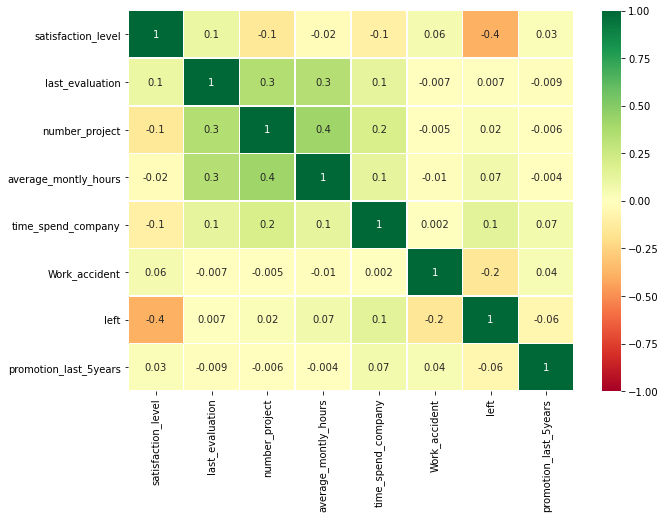

In [5]:
#Построим матрицу корреляций для таблицы
print('\nМАТРИЦА КОРРЕЛЯЦИЙ')
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(data.corr(),annot=True, vmin=-1, vmax=1, center= 0, cmap= 'RdYlGn', linewidths=0.5, fmt='.1g')
plt.show()

##### Вывод: 
1. Максимальный коэффициент корреляции Пирсона составил 0,4 для переменных number_project и average_montly_hours. 
2. Максимальный обратный коэффициент корреляции Пирсона составил -0,4 для переменных left и satisfaction_level. 
2. Поскольку коэффициенты корреляции Пирсона не превышают 0,5 по модулю, значит сила линейной взаимосвязи между переменными низкая.

## 4. Визуализировать несколько взаимосвязей между переменными.

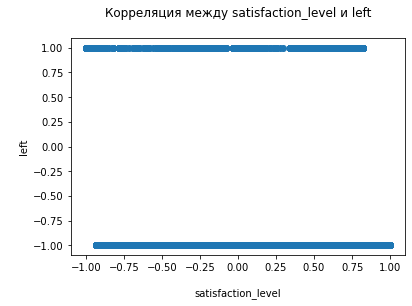

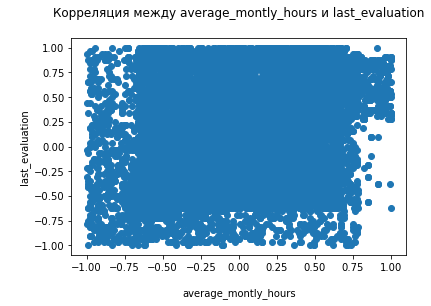

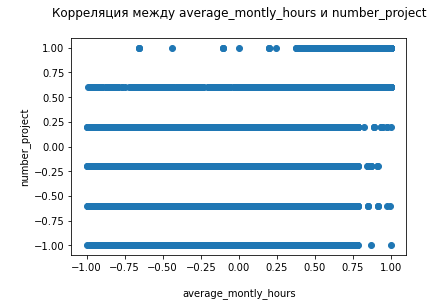

In [6]:
## НОРМАЛИЗАЦИЯ ПАРАМЕТРОВ
# Таблица только с численными данными
data_new = data.drop('sales', 1).drop('salary', 1)
data_new

# Выделение колонок в отдельный список
headers = list(data_new.columns.values)

# Нормализация параметров
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
np_scaled = min_max_scaler.fit_transform(data_new)
df_norm = pd.DataFrame(np_scaled)

#Восстановление названия колонок
df_norm.columns = headers

##ПОСТРОЕНИЕ ГРАФИКОВ
# График зависимости между satisfaction_level и left
plt.scatter(df_norm['satisfaction_level'], df_norm['left'])
plt.title('Корреляция между satisfaction_level и left\n')
plt.xlabel('\nsatisfaction_level')
plt.ylabel('\nleft')
plt.show()

# График зависимости между average_montly_hours и last_evaluation
plt.scatter(df_norm['average_montly_hours'], df_norm['last_evaluation'])
plt.title('Корреляция между average_montly_hours и last_evaluation\n')
plt.xlabel('\naverage_montly_hours')
plt.ylabel('\nlast_evaluation')
plt.show()

# График зависимости между average_montly_hours и number_project
plt.scatter(df_norm['average_montly_hours'], df_norm['number_project'])
plt.title('Корреляция между average_montly_hours и number_project\n')
plt.xlabel('\naverage_montly_hours')
plt.ylabel('\nnumber_project')
plt.show()

##### Вывод: Графики демонстрируют низкую линейную корреляцию между переменными.

## 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

### Пропускаю (т.к. можно делать не все ;) )

## 6. Рассчитать сколько работников работает в каждом департаменте.

In [7]:
emloyees_count = data.sales.value_counts().reset_index()
emloyees_count.columns = ['sales','emloyees']
emloyees_count

,sales,emloyees
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


In [8]:
print('Наибольшее число сотрудников:')
emloyees_count.head(1)

Наибольшее число сотрудников:


,sales,emloyees
0,sales,4140


##### Вывод: Поскольку наибольшее число сотрудников работает в департаменте по продажам, то можно предположить, что компания занимается активными продажами с большим количеством контрагентов. 

In [9]:
print('Наименьшее число сотрудников:')
emloyees_count.tail(1)

Наименьшее число сотрудников:


,sales,emloyees
9,management,630


##### Вывод: Наименьшее количество сотрудников представлено управляющим персоналом.

## 7. Показать распределение сотрудников по зарплатам.

Text(0, 0.5, '\nEmployees')

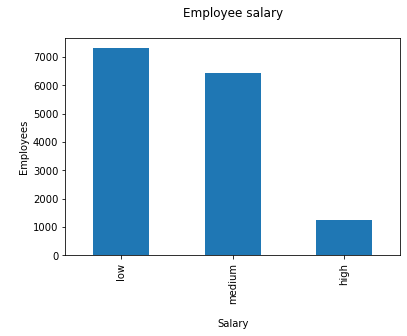

In [10]:
employee_salary = data.salary.value_counts()

# bar-график
employee_salary.plot(kind='bar')
plt.title('Employee salary\n')
plt.xlabel('\nSalary')
plt.ylabel('\nEmployees')

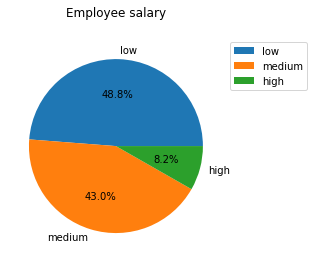

In [11]:
# pie-график
employee_salary.plot(kind='pie', y='booking', autopct='%1.1f%%')
plt.title('Employee salary\n')
plt.ylabel('')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

##### Вывод: Наибольшее количество сотрудников (почти половина от общего числа) получает зарплату low. Меньше всего сотрудников (около 8%) получает зарплату high. 

## 8. Показать распределение сотрудников по зарплатам совместно с департаментами.

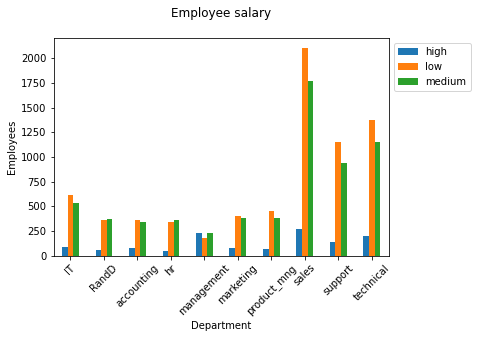

In [12]:
salary_by_department = data.groupby(['sales', 'salary'])['satisfaction_level'].count()

salary_by_department.unstack().plot(kind='bar', rot=45, stacked=False)
plt.title('Employee salary\n')
plt.xlabel('Department')
plt.ylabel('Employees')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

In [13]:
print(salary_by_department)

sales        salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: satisfaction_level, dtype: int64


In [19]:
#Структура зарплаты в департаменте management
salary_by_department = data.groupby(['sales', 'salary'])['satisfaction_level'].count()

salary_by_department = salary_by_department.reset_index()
management_salary = salary_by_department.loc[salary_by_department['sales'] == 'management']
management_salary.drop(['sales'], axis='columns', inplace=True)
management_salary.columns = ['salary','emloyees']
management_salary['emloyees'].sum()
share = management_salary.loc[ (management_salary.emloyees != 0), 'share_of_emploeeys' ] = management_salary['emloyees'] / management_salary['emloyees'].sum()
print('Структура зарплаты в департаменте management\n')
print(management_salary)

Структура зарплаты в департаменте management

    salary  emloyees  share_of_emploeeys
12       0       180            0.285714
13       5       225            0.357143
14      10       225            0.357143


##### Вывод: 
1. Больше всего сотрудников с зарплатой high работает в департаментах sales, management и technical (269, 225 и 201 человек соответственно). Вместе с этим департамент sales также самый многочисленный по количеству сотрудников с зарплатой medium (1772 человека) и low (2099 человек).
2. Самый высокооплачиваемый персонал работает в самом малочисленном департаменте - management. Удельная суммарная доля сотрудников с зарплатой high и medium в этом департаменте составляет 0,7.

## 9. Сколько сотрудников покинули компанию.

In [15]:
print('Компанию покинуло: ', data.left.sum(), 'сотрудников')

Компанию покинуло:  3571 сотрудников


In [16]:
## ДОПОЛНИТЕЛЬНЫЕ РАСЧЕТЫ:
# Доля сотрудников, покинувших компанию
print(f'Доля сотрудников, покинувших компанию = {round(data.left.sum()/data.left.count(), 2)}')

# Период работы компании
print(f'Период работы компании = {data.time_spend_company.max()} лет')

# Среднегодовой коэффициент текучести кадров компании
print(f'Среднегодовой коэффициент текучести кадров =  {round(data.left.sum()/data.left.count() / data.time_spend_company.max(), 3)}')

# Средний стаж работы сотрудников в компании, которые ее покинули
data['employee_left'] = data['time_spend_company'] 
data.loc[ (data.left == 0) , 'employee_left' ] = 0
print(f'Средний стаж сотрудников, покинувших компанию = {round(data.employee_left.sum()/data.left.sum(), 1)} лет')


Доля сотрудников, покинувших компанию = 0.24
Период работы компании = 10 лет
Среднегодовой коэффициент текучести кадров =  0.024
Средний стаж сотрудников, покинувших компанию = 3.9 лет


##### Вывод: 
1. Доля сотрудников, покинувших компанию за 10 лет составила около 24%. Таким образом, среднегодовой коэффициент текучести кадров составил около 2%, что может свидетельствовать о кадровом застое.
2. Средний стаж работы сотрудников в компании, которые ее покинули, составил 3,9 лет. Этот показатель соответствует среднему времени работы в одной компании (3-5 лет).

## 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

### гипотеза о том, что сотрудники без promotion_last_5years увольняются чаще:

In [17]:
promotion = data[data['promotion_last_5years']==1]['left']
no_promotion = data[data['promotion_last_5years']==0]['left']
descriptives, results = rp.ttest(promotion, no_promotion)
print(descriptives)
print('_____________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0      left    319.0  0.059561  0.237044  0.013272   0.033449  0.085673
1      left  14680.0  0.241962  0.428286  0.003535   0.235033  0.248891
2  combined  14999.0  0.238083  0.425924  0.003478   0.231266  0.244899
_____________________________
            Independent t-test     results
0  Difference (left - left) =      -0.1824
1        Degrees of freedom =   14997.0000
2                         t =      -7.5812
3     Two side test p value =       0.0000
4    Difference < 0 p value =       0.0000
5    Difference > 0 p value =       1.0000
6                 Cohen's d =      -0.4291
7                 Hedge's g =      -0.4290
8             Glass's delta =      -0.7695
9                         r =       0.0618


##### Вывод: гипотеза верна. Сотрудники без promotion_last_5years увольняются примерно в 4 раза чаще.

### гипотеза о том, что сотрудники с salary ниже среднего увольняются чаще.

In [18]:
data.loc[ (data.salary.isin(['low'])), 'salary' ] = 0
data.loc[ (data.salary.isin(['medium'])), 'salary' ] = 5
data.loc[ (data.salary.isin(['high'])), 'salary' ] = 10

satisfaction = data[data['salary'] >= 5]['left']
no_satisfaction = data[data['salary'] < 5]['left']
descriptives, results = rp.ttest(satisfaction, no_satisfaction)
print(descriptives)
print('_____________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0      left   7683.0  0.182090  0.385944  0.004403   0.173459  0.190722
1      left   7316.0  0.296884  0.456916  0.005342   0.286412  0.307355
2  combined  14999.0  0.238083  0.425924  0.003478   0.231266  0.244899
_____________________________
            Independent t-test     results
0  Difference (left - left) =      -0.1148
1        Degrees of freedom =   14997.0000
2                         t =     -16.6501
3     Two side test p value =       0.0000
4    Difference < 0 p value =       0.0000
5    Difference > 0 p value =       1.0000
6                 Cohen's d =      -0.2720
7                 Hedge's g =      -0.2720
8             Glass's delta =      -0.2974
9                         r =       0.1347


##### Вывод: гипотеза верна. Сотрудники с salary ниже medium  увольняются чаще.